# Day 08. Exercise 01
# Binary classifier. SVM. Decision tree

## 0. Imports

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

## 1. Preprocessing and logreg visualization

Read the file `am_pm.csv` to a dataframe from the previous exercise.

1. Draw a plot where the x-axis is `am`, the y-axis is `pm`, dots are the days, color depends on the target.
2. Add the decision boundary of logistic regression to the plot.
3. Draw the same plot (with the boundary), but the color should depend this time on the predictions.

Now it should be clear for you how the logistic regression works.

1. Нарисуйте график, где ось x — `am`, ось y — `pm`, точки — дни, цвет зависит от цели.
2. Добавьте к графику границу принятия решений логистической регрессии.
3. Нарисуйте тот же график (с границей), но цвет на этот раз должен зависеть от прогнозов.

Теперь вам должно быть понятно, как работает логистическая регрессия.

In [36]:
df = pd.read_csv('../data/am_pm.csv')
X = df[['am', 'pm']]
y = df['target']
y_pred = df['predict']

In [37]:
# Train logistic regression model
logreg = LogisticRegression(random_state=21, fit_intercept=False)
logreg.fit(X, y)

LogisticRegression(fit_intercept=False, random_state=21)

In [38]:
x_min, x_max = X['am'].min() - 1, X['am'].max() + 1
y_min, y_max = X['pm'].min() - 1, X['pm'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.where(Z == 'weekend', 0, 1).reshape(xx.shape)

/Users/enzheakhmetova/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


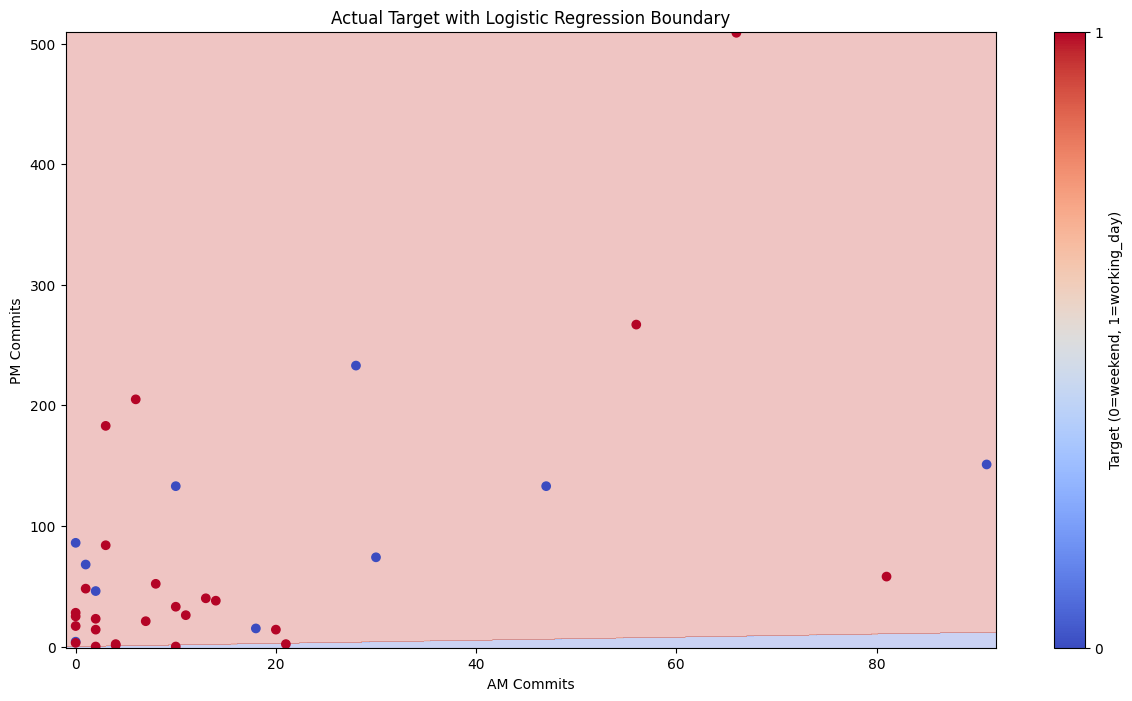

In [39]:
plt.figure(figsize=(15, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X['am'], X['pm'], c=np.where(y == 'weekend', 0, 1), cmap='coolwarm')
plt.xlabel('AM Commits')
plt.ylabel('PM Commits')
plt.title('Actual Target with Logistic Regression Boundary')
plt.colorbar(ticks=[0, 1], label='Target (0=weekend, 1=working_day)')
plt.show()

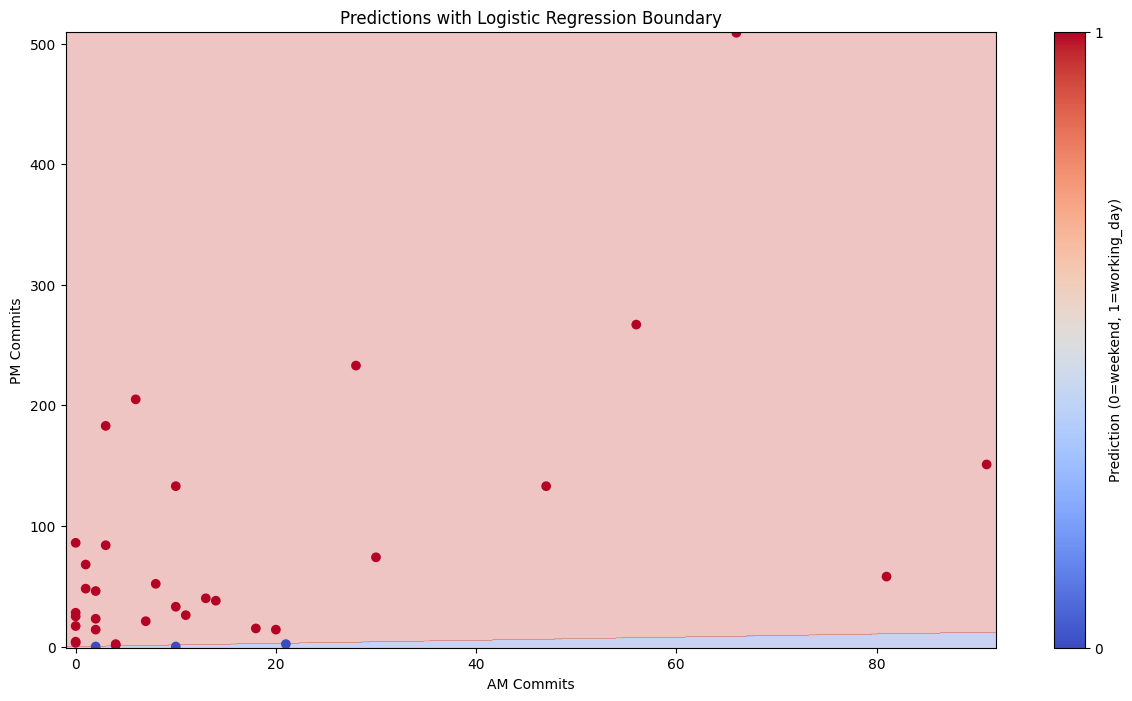

In [40]:
plt.figure(figsize=(15, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X['am'], X['pm'], c=np.where(y_pred == 'weekend', 0, 1), cmap='coolwarm')
plt.xlabel('AM Commits')
plt.ylabel('PM Commits')
plt.title('Predictions with Logistic Regression Boundary')
plt.colorbar(ticks=[0, 1], label='Prediction (0=weekend, 1=working_day)')
plt.show()

## 2. Standardizing and logreg

Linear models can be sensitive to the scale of your variables. You make it easier for them to find the optimal solution when you scale your features.

1. Apply `StandardScaler` to `X` and train logistic regression again with the same parameters.
2. Calculate `accuracy` for the new model. Did it get better than a naive classifier with the most popular class?
3. Draw the plots that were described above but for the new model.

Линейные модели могут быть чувствительны к масштабу ваших переменных. Вы облегчаете им поиск оптимального решения, когда масштабируете свои признаки.

1. Примените `StandardScaler` к `X` и снова обучите логистическую регрессию с теми же параметрами.
2. Рассчитайте `accuracy` для новой модели. Стало ли это лучше, чем наивный классификатор с самым популярным классом?
3. Нарисуйте графики, которые были описаны выше, но для новой модели.

In [41]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [42]:
# Train logistic regression on scaled data
logreg_scaled = LogisticRegression(random_state=21, fit_intercept=False)
logreg_scaled.fit(X_scaled, y)

LogisticRegression(fit_intercept=False, random_state=21)

In [43]:
# Make predictions and calculate accuracy
y_pred_scaled = logreg_scaled.predict(X_scaled)
accuracy = accuracy_score(y, y_pred_scaled)
naive_accuracy = accuracy_score(y, ['working_day']*len(y))

print(f"Scaled Logistic Regression Accuracy: {accuracy:.4f}")
print(f"Naive Classifier Accuracy: {naive_accuracy:.4f}")

Scaled Logistic Regression Accuracy: 0.7429
Naive Classifier Accuracy: 0.7143


In [44]:
xx_scaled, yy_scaled = np.meshgrid(np.linspace(X_scaled[:,0].min()-1, X_scaled[:,0].max()+1, 100),
                                  np.linspace(X_scaled[:,1].min()-1, X_scaled[:,1].max()+1, 100))
Z_scaled = logreg_scaled.predict(np.c_[xx_scaled.ravel(), yy_scaled.ravel()])
Z_scaled = np.where(Z_scaled == 'weekend', 0, 1).reshape(xx_scaled.shape)

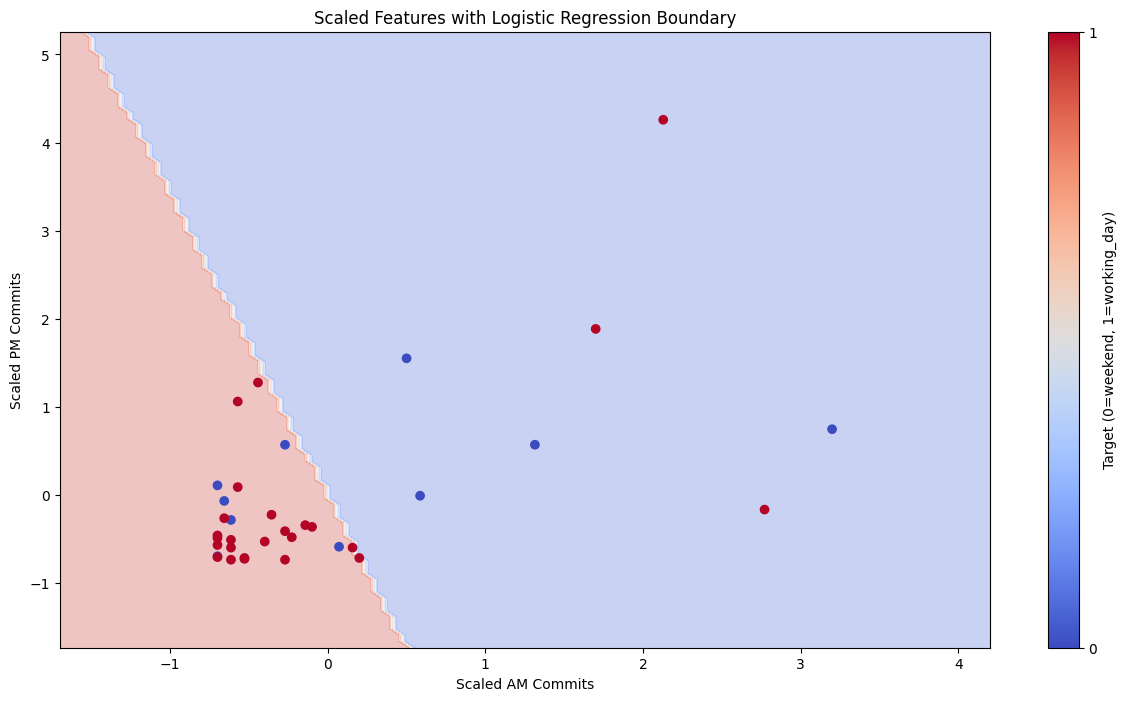

In [45]:

plt.figure(figsize=(15, 8))
plt.contourf(xx_scaled, yy_scaled, Z_scaled, alpha=0.3, cmap='coolwarm')
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=np.where(y == 'weekend', 0, 1), cmap='coolwarm')
plt.xlabel('Scaled AM Commits')
plt.ylabel('Scaled PM Commits')
plt.title('Scaled Features with Logistic Regression Boundary')
plt.colorbar(ticks=[0, 1], label='Target (0=weekend, 1=working_day)')
plt.show()

## 3. SVM

1. Apply `SVC` model to the scaled dataframe using parameters `probability=True`, `random_state=21`.
2. Calculate `accuracy`.
3. Try different kernels, find the best in terms of accuracy.
4. Draw both plots again with the decisions boundary to see how this algorithm works.

1. Примените модель `SVC` к масштабированному фрейму данных, используя параметры `probability=True`, `random_state=21`.
2. Рассчитайте `accuracy`.
3. Попробуйте разные ядра, найдите лучшее с точки зрения точности.
4. Снова нарисуйте оба графика с границей решений, чтобы увидеть, как работает этот алгоритм.

In [46]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
best_accuracy = 0
best_svc = None
for kernel in kernels:
    svc = SVC(probability=True, random_state=21, kernel=kernel)
    svc.fit(X_scaled, y)
    y_pred_svc = svc.predict(X_scaled)
    acc = accuracy_score(y, y_pred_svc)
    print(f"SVM ({kernel} kernel) Accuracy: {acc:.4f}")
    
    if acc > best_accuracy:
        best_accuracy = acc
        best_svc = svc
        best_kernel = kernel

print(f"\nBest kernel: {best_kernel} with accuracy: {best_accuracy:.4f}")


SVM (linear kernel) Accuracy: 0.7143
SVM (poly kernel) Accuracy: 0.7429
SVM (rbf kernel) Accuracy: 0.7429
SVM (sigmoid kernel) Accuracy: 0.6857

Best kernel: poly with accuracy: 0.7429


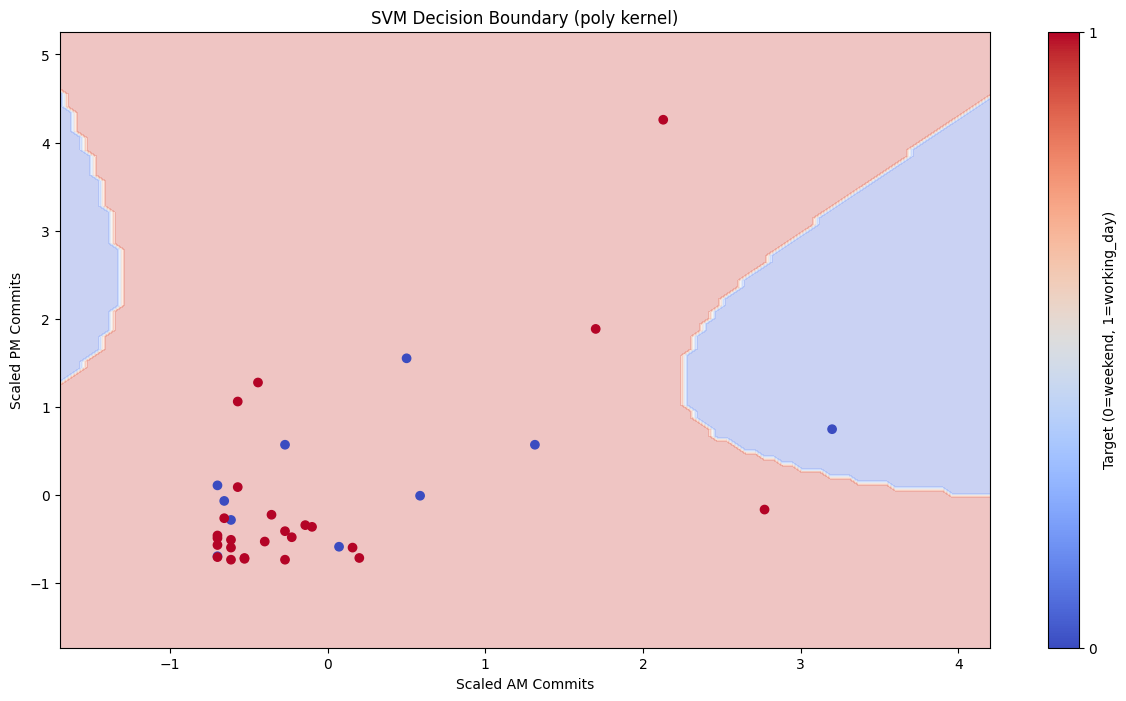

In [47]:
Z_svc = best_svc.predict(np.c_[xx_scaled.ravel(), yy_scaled.ravel()])
Z_svc = np.where(Z_svc == 'weekend', 0, 1).reshape(xx_scaled.shape)

plt.figure(figsize=(15, 8))
plt.contourf(xx_scaled, yy_scaled, Z_svc, alpha=0.3, cmap='coolwarm')
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=np.where(y == 'weekend', 0, 1), cmap='coolwarm')
plt.xlabel('Scaled AM Commits')
plt.ylabel('Scaled PM Commits')
plt.title(f'SVM Decision Boundary ({best_kernel} kernel)')
plt.colorbar(ticks=[0, 1], label='Target (0=weekend, 1=working_day)')
plt.show()

## 4. Decision tree

1. Apply `DecisionTreeClassifier` to the scaled dataframe using parameters `max_depth=4`, `random_state=42`.
2. Calculate accuracy.
3. Try different values of `max_depth`.
4. Draw both plots again with the decisions boundary to see how this algorithm works.
5. Using method `.plot_tree()` visualize the decision tree itself. It is another way of thinking about how the algorithm works.
6. How many leaves in the visualized tree label days as working days? Put your answer in the markdown cell in the end of the section.

1. Примените `DecisionTreeClassifier` к масштабированному фрейму данных, используя параметры `max_depth=4`, `random_state=42`.
2. Рассчитайте точность.
3. Попробуйте разные значения `max_depth`.
4. Снова нарисуйте оба графика с границей решений, чтобы увидеть, как работает этот алгоритм.
5. Используя метод `.plot_tree()`, визуализируйте само дерево решений. Это еще один способ представления того, как работает алгоритм.
6. Сколько листьев в визуализированном дереве помечают дни как рабочие? Поместите свой ответ в ячейку markdown в конце раздела.

In [48]:
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_scaled, y)
y_pred_tree = tree.predict(X_scaled)
tree_accuracy = accuracy_score(y, y_pred_tree)
print(f"Decision Tree (max_depth=4) Accuracy: {tree_accuracy:.4f}")

Decision Tree (max_depth=4) Accuracy: 0.9429


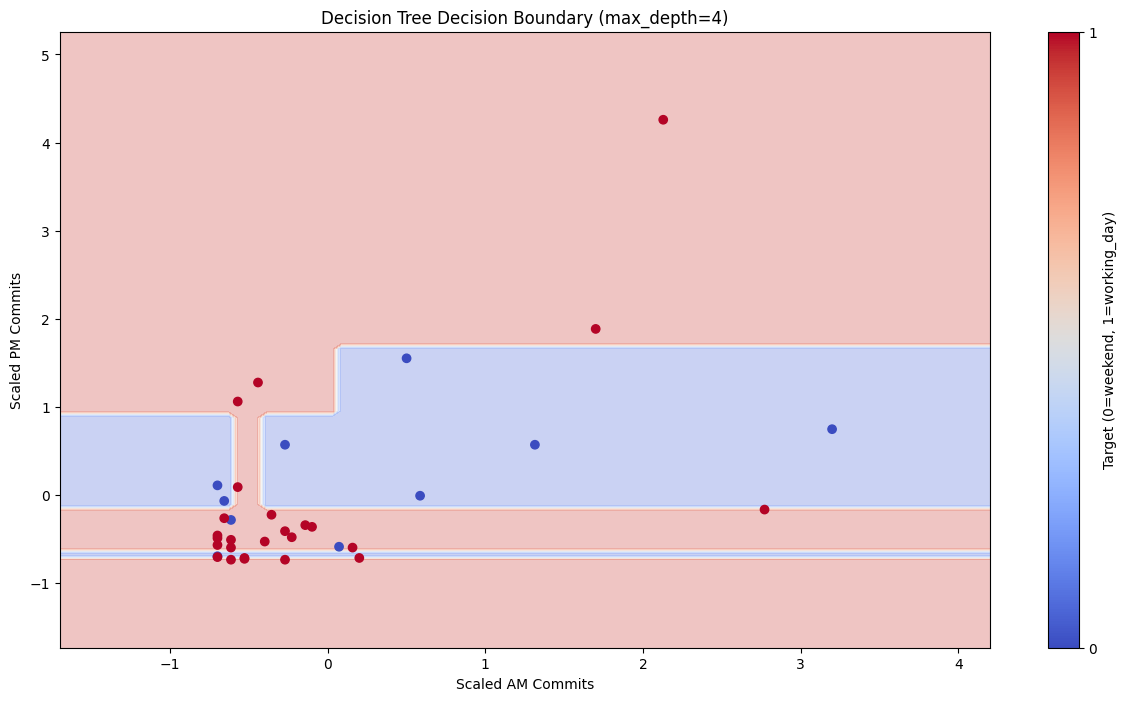

In [49]:
# Plot decision tree boundary
Z_tree = tree.predict(np.c_[xx_scaled.ravel(), yy_scaled.ravel()])
Z_tree = np.where(Z_tree == 'weekend', 0, 1).reshape(xx_scaled.shape)
plt.figure(figsize=(15, 8))
plt.contourf(xx_scaled, yy_scaled, Z_tree, alpha=0.3, cmap='coolwarm')
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=np.where(y == 'weekend', 0, 1), cmap='coolwarm')
plt.xlabel('Scaled AM Commits')
plt.ylabel('Scaled PM Commits')
plt.title('Decision Tree Decision Boundary (max_depth=4)')
plt.colorbar(ticks=[0, 1], label='Target (0=weekend, 1=working_day)')
plt.show()

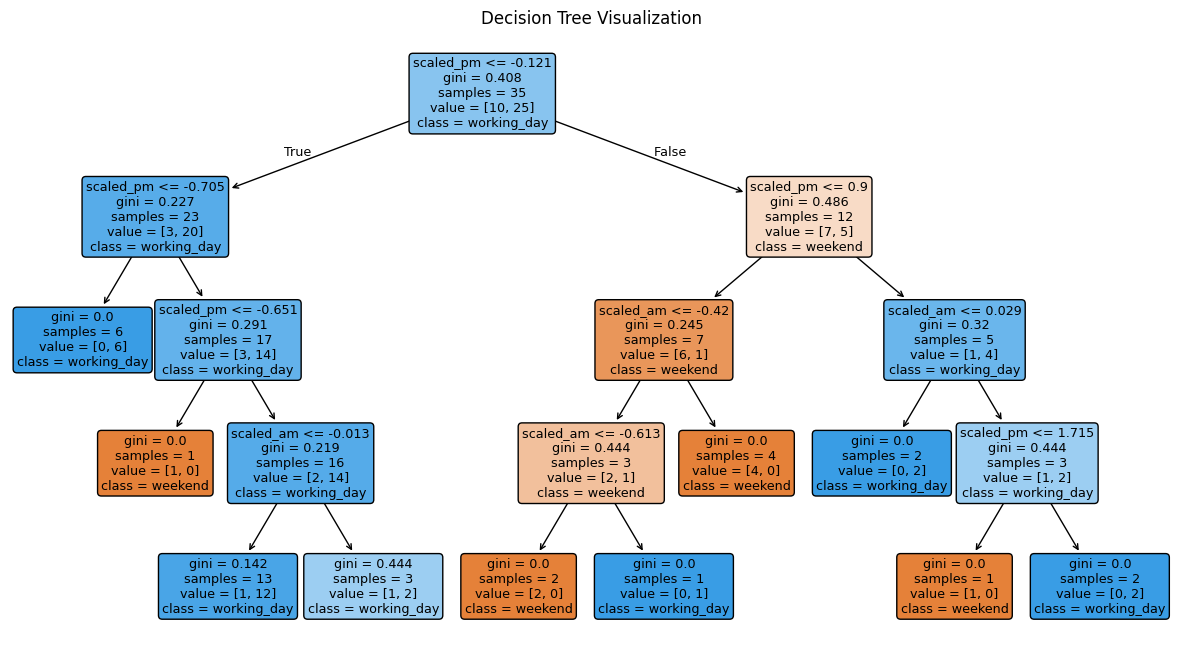

In [50]:
# Decision tree
plt.figure(figsize=(15, 8))
plot_tree(tree, filled=True, feature_names=['scaled_am', 'scaled_pm'], 
          class_names=['weekend', 'working_day'], rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

In [51]:
# Count leaves labeling working days
n_leaves = tree.tree_.n_leaves
leaf_classes = tree.apply(X_scaled)
working_day_leaves = 0

for leaf_id in np.unique(leaf_classes):
    leaf_samples = np.where(leaf_classes == leaf_id)[0]
    leaf_class = tree.predict([X_scaled[leaf_samples[0]]])[0]
    if leaf_class == 'working_day':
        working_day_leaves += 1

print(f"Total leaves: {n_leaves}")
print(f"Leaves labeling working days: {working_day_leaves}")

Total leaves: 10
Leaves labeling working days: 6
